# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

## Importing the dataset

In [2]:
df = pd.read_csv("Wholesale customers data.csv")

In [3]:
df.head(10)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669   9656     7561     214              2674   
1        2       3   7057   9810     9568    1762              3293   
2        2       3   6353   8808     7684    2405              3516   
3        1       3  13265   1196     4221    6404               507   
4        2       3  22615   5410     7198    3915              1777   
5        2       3   9413   8259     5126     666              1795   
6        2       3  12126   3199     6975     480              3140   
7        2       3   7579   4956     9426    1669              3321   
8        1       3   5963   3648     6192     425              1716   
9        2       3   6006  11093    18881    1159              7425   

   Delicassen  
0        1338  
1        1776  
2        7844  
3        1788  
4        5185  
5        1451  
6         545  
7        2566  
8         750  
9        2098

In [4]:
df.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

In [5]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
df.shape

(440, 8)

In [8]:
# Inspect the dataset
print(df.index.is_unique)
print(df.columns.is_unique)

True
True


In [9]:
df['Channel'] = df['Channel'].map({1:'Hotel',2:'Retail'})
df['Region'] = df['Region'].map({1:'Lisbon',2:'Oporto',3:'other'})

# Exploratory Data Analysis

In [10]:
df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

<AxesSubplot:title={'center':'Channel Count'}, xlabel='Channel', ylabel='count'>

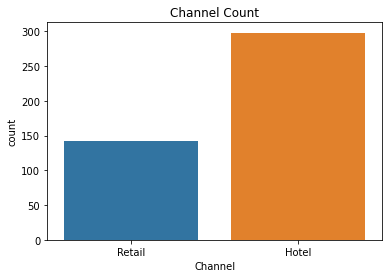

In [11]:
plt.title('Channel Count')
sns.countplot(x=df['Channel'])

In [12]:
df['Region'].value_counts()

other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

<AxesSubplot:title={'center':'Region Count'}, xlabel='Region', ylabel='count'>

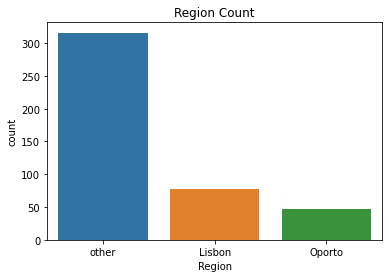

In [13]:
plt.title('Region Count')
sns.countplot(x=df['Region'])

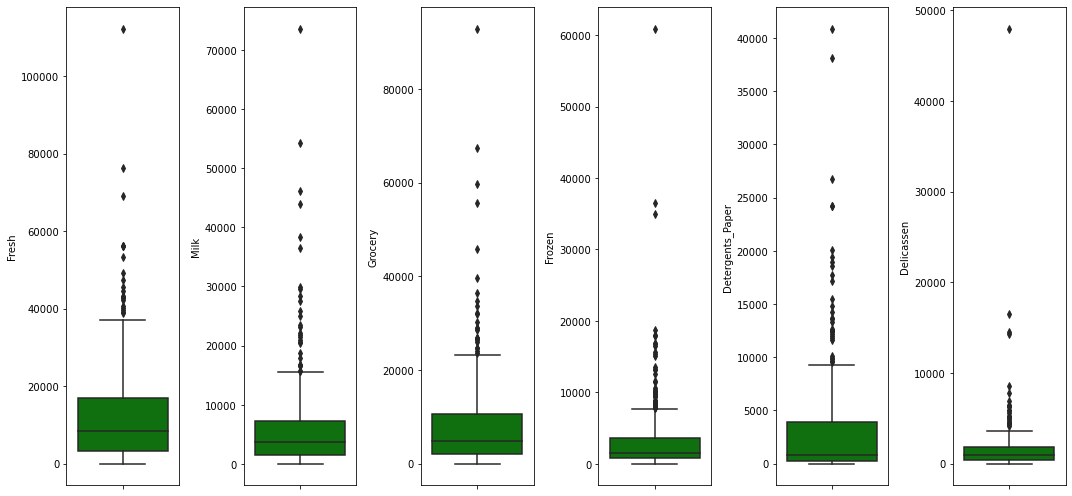

In [14]:
Columns = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen']
plt.figure(figsize=(15, 7))
for i in range(0, len(Columns)):
    plt.subplot(1, len(Columns), i+1)
    sns.boxplot(y=df[Columns[i]], color='green', orient='v')
    plt.tight_layout()

In [15]:
df.groupby('Channel')['Region'].value_counts()

Channel  Region
Hotel    other     211
         Lisbon     59
         Oporto     28
Retail   other     105
         Oporto     19
         Lisbon     18
Name: Region, dtype: int64

<AxesSubplot:xlabel='Channel'>

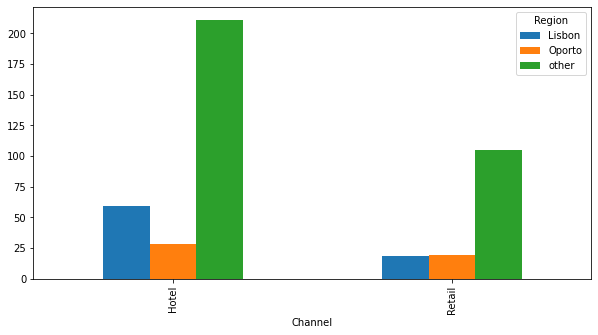

In [16]:
pd.crosstab(df['Channel'],df['Region']).plot(kind='bar',figsize=(10,5))


<AxesSubplot:title={'center':'Pearson Correlation'}>

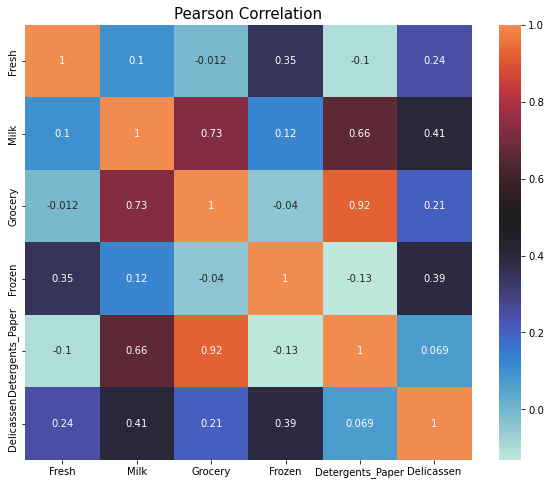

In [17]:
# Compute the correlation matrix
plt.figure(figsize=(10,8))
plt.title('Pearson Correlation',fontsize =15)
sns.heatmap(df.corr(), center=0.5,annot=True)

From the Pearson Correlation matrix above we observe a strong correlation of 0.92 between Detergents and paper products and Grocery product which indicates that customers spend more on the two products

## 

In [18]:
#creating sum of all the products into a new column - Total_spend
df['Total_spend'] = df['Fresh'] + df['Milk'] + df['Grocery'] + df['Frozen'] + df['Detergents_Paper'] + df['Delicassen']

In [19]:
total_spend_by_region = df.groupby('Region')['Total_spend'].sum()
total_spend_by_region

Region
Lisbon     2386813
Oporto     1555088
other     10677599
Name: Total_spend, dtype: int64

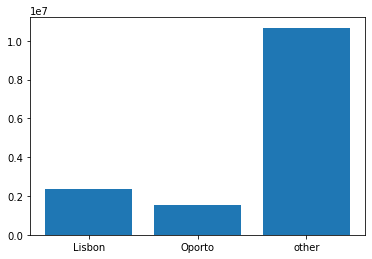

In [20]:
plt.bar(total_spend_by_region.keys(),total_spend_by_region);

In [21]:
total_spend_by_channel = df.groupby('Channel')['Total_spend'].sum()
total_spend_by_channel

Channel
Hotel     7999569
Retail    6619931
Name: Total_spend, dtype: int64

<BarContainer object of 2 artists>

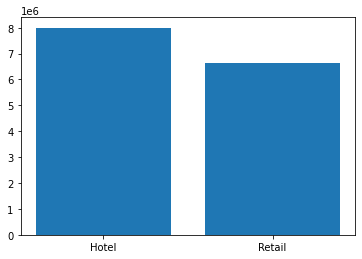

In [22]:
plt.bar(total_spend_by_channel.keys(),total_spend_by_channel)

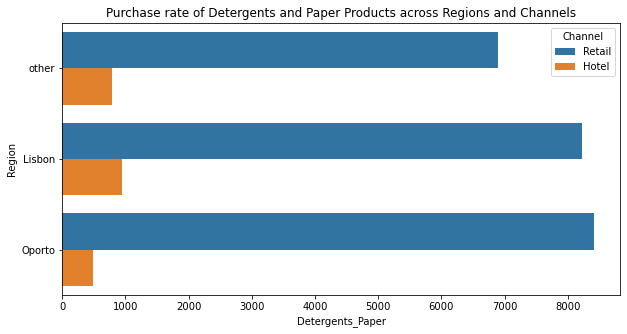

In [23]:
plt.figure(figsize=(10,5))
plt.title('Purchase rate of Detergents and Paper Products across Regions and Channels')
sns.barplot(x="Detergents_Paper", y="Region", hue ="Channel",data=df,ci=False);

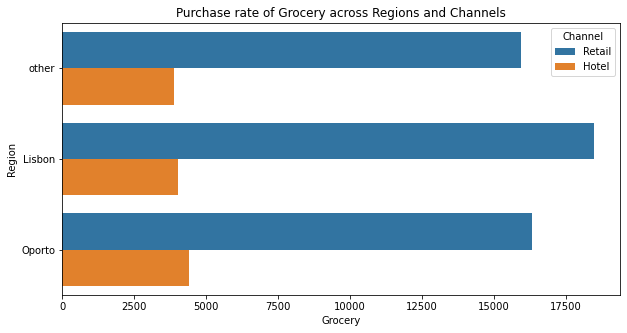

In [24]:
plt.figure(figsize=(10,5))
plt.title('Purchase rate of Grocery across Regions and Channels')
sns.barplot(x="Grocery", y="Region", hue ="Channel",data=df,ci=False);

# Data Preprocessing

## Outliers

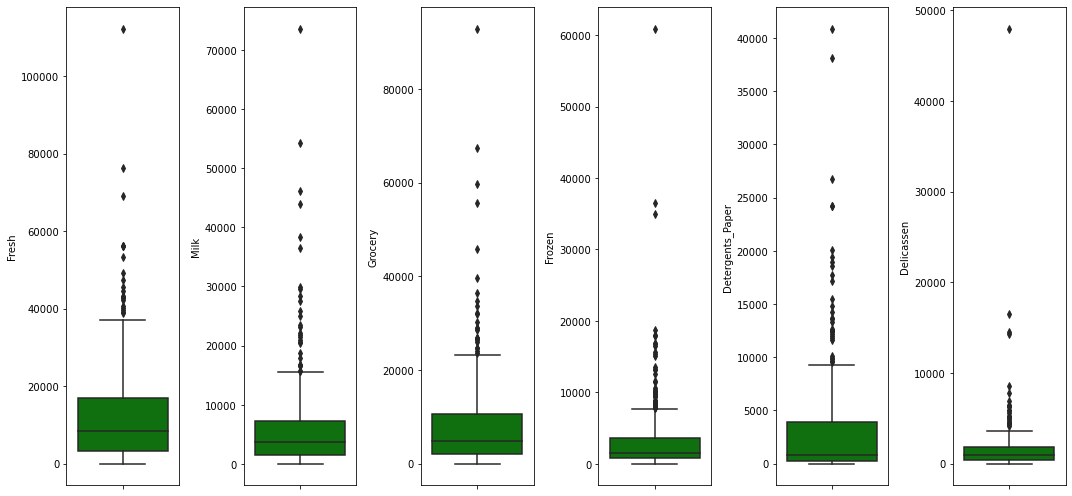

In [25]:
Columns = ['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper','Delicassen']
plt.figure(figsize=(15, 7))
for i in range(0, len(Columns)):
    plt.subplot(1, len(Columns), i+1)
    sns.boxplot(y=df[Columns[i]], color='green', orient='v')
    plt.tight_layout()

Outliers were detected but does not compulsorily mean it must be removed. In a dataset where the unit of measurement of features tends to make some features ...

## Feature Scaling

In [26]:
X = df.iloc[:,2:].values
X

array([[12669,  9656,  7561, ...,  2674,  1338, 34112],
       [ 7057,  9810,  9568, ...,  3293,  1776, 33266],
       [ 6353,  8808,  7684, ...,  3516,  7844, 36610],
       ...,
       [14531, 15488, 30243, ..., 14841,  1867, 77407],
       [10290,  1981,  2232, ...,   168,  2125, 17834],
       [ 2787,  1698,  2510, ...,   477,    52,  7589]], dtype=int64)

In [27]:
# Scaling the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

# KMeans Clustering

## Using the Elbow method to find the optimal number of clusters

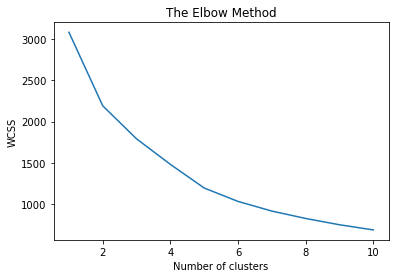

In [28]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

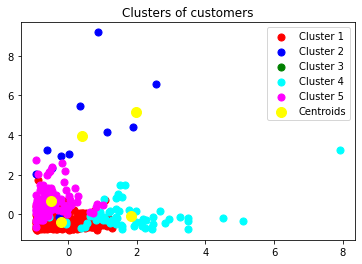

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [31]:
df_cluster = df
df_cluster['Cluster'] = y_kmeans

In [32]:
df_cluster.Cluster.value_counts()

0    279
4     94
3     55
1     11
2      1
Name: Cluster, dtype: int64

# Using PCA for Easy Visualization

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pc = pca.fit_transform(X)
pc_df = pd.DataFrame(pc)
pc_df.columns = ['pc1','pc2']

In [34]:
pca_clustering = pd.concat([pc_df,df_cluster['Cluster']],axis=1)

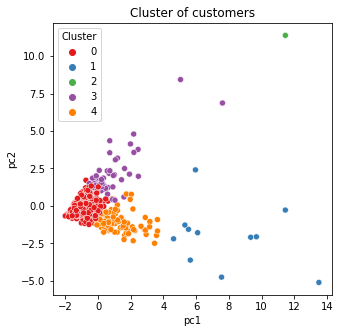

In [35]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='pc1', y='pc2', hue= 'Cluster', data=pca_clustering,palette='Set1').set_title('Cluster of customers')
plt.show()

In [36]:
df_cluster.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0  Retail  other  12669  9656     7561     214              2674        1338   
1  Retail  other   7057  9810     9568    1762              3293        1776   
2  Retail  other   6353  8808     7684    2405              3516        7844   
3   Hotel  other  13265  1196     4221    6404               507        1788   
4  Retail  other  22615  5410     7198    3915              1777        5185   

   Total_spend  Cluster  
0        34112        0  
1        33266        4  
2        36610        4  
3        27381        0  
4        46100        3

# Heirarchical Clustering

## Using the dendogram to find the optimal number of clusters

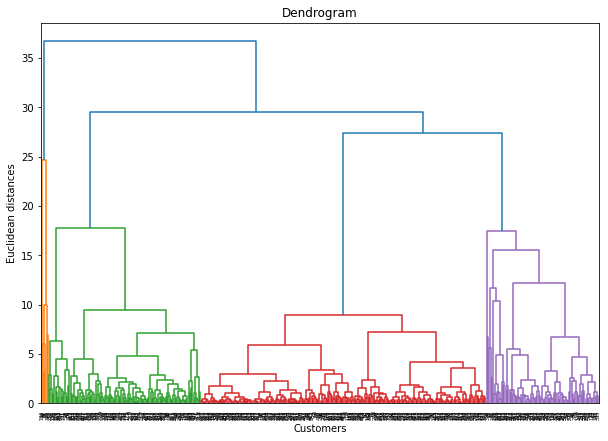

In [37]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))  
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Identifying the optimum number of clusters

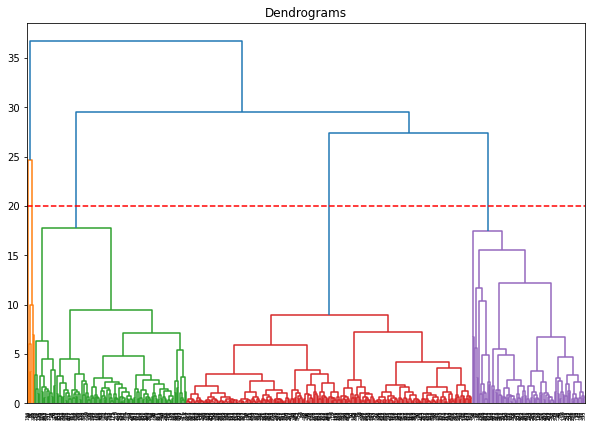

In [38]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(X, method='ward'))
plt.axhline(y=20, color='r', linestyle='--')

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

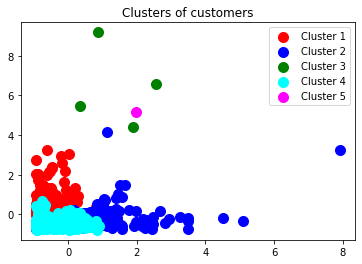

In [40]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.legend()
plt.show()

In [41]:
df_cluster_hc = df
df_cluster_hc['Cluster'] = y_hc

In [42]:
df_cluster_hc.Cluster.value_counts()

3    225
0    120
1     89
2      5
4      1
Name: Cluster, dtype: int64

# Using PCA for Easy Visualization

In [43]:
pca_clustering_hc = pd.concat([pc_df,df_cluster_hc['Cluster']],axis=1)

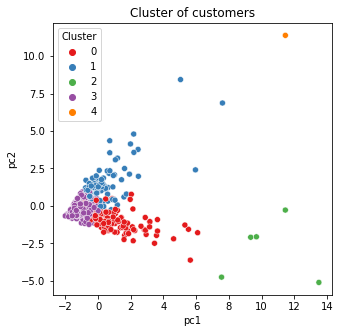

In [44]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='pc1', y='pc2', hue= 'Cluster', data=pca_clustering_hc,palette='Set1').set_title('Cluster of customers')
plt.show()

In [45]:
df_cluster_hc.head()

Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen  \
0  Retail  other  12669  9656     7561     214              2674        1338   
1  Retail  other   7057  9810     9568    1762              3293        1776   
2  Retail  other   6353  8808     7684    2405              3516        7844   
3   Hotel  other  13265  1196     4221    6404               507        1788   
4  Retail  other  22615  5410     7198    3915              1777        5185   

   Total_spend  Cluster  
0        34112        0  
1        33266        0  
2        36610        0  
3        27381        3  
4        46100        1